In [2]:
import numpy as np
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

import matplotlib.pyplot as plt
from glob import glob
import os

%matplotlib inline

In [5]:
## Loading all the files from the 25 Mpc box and adding them together

machine='coho'

if machine=='chinook':
    directory='/Users/lokhorst/Desktop/EAGLE/Niagaraoutput/queue'
elif machine=='coho':
    directory='/Users/deblokhorst/Desktop/EAGLE'

global halpha_25mpc
## load the halpha
halpha_25Mpc_fname = directory+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(halpha_25Mpc_fname):
    halpha_25mpc = np.load(halpha_25Mpc_fname)['arr_0']
elif machine=='chinook':
    halpha_25mpc_files = glob(directory+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print halpha_25mpc_files
    halpha_25mpc = np.load(halpha_25mpc_files[0])['arr_0']
    for filename in halpha_25mpc_files[1:]:
        print 'adding: '+filename
        halpha_25mpc = np.log10(10**halpha_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(halpha_25Mpc_fname,halpha_25mpc)
else:
    print halpha_25Mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'

global o3_25mpc
## load the oiii
o3_25mpc_fname = directory+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(o3_25mpc_fname):
    o3_25mpc = np.load(o3_25mpc_fname)['arr_0']
elif machine=='chinook':
    o3_25mpc_files = glob(directory+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print o3_25mpc_files
    o3_25mpc = np.load(o3_25mpc_files[0])['arr_0']
    for filename in o3_25mpc_files[1:]:
        print 'adding: '+filename
        o3_25mpc = np.log10(10**o3_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(o3_25mpc_fname,o3_25mpc)
else:
    print o3_25mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'
    
global lyalpha_25mpc
### load the Lyalpha
lyalpha_25mpc_fname = directory+'/emission_lyalpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(lyalpha_25mpc_fname):
    lyalpha_25mpc = np.load(lyalpha_25mpc_fname)['arr_0']
elif machine=='chinook':
    lyalpha_25mpc_files = glob(directory+'/emission_lyalpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print lyalpha_25mpc_files
    lyalpha_25mpc = np.load(lyalpha_25mpc_files[0])['arr_0']
    for filename in lyalpha_25mpc_files[1:]:
        print 'adding: '+filename
        lyalpha_25mpc = np.log10(10**lyalpha_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(lyalpha_25mpc_fname,lyalpha_25mpc)
else:
    print lyalpha_25mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'


/Users/deblokhorst/Desktop/EAGLE/emission_lyalpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz does not exist.  Need to copy over/make on chinook where the slices are.


In [7]:
o3_25mpc.shape

(8000, 8000)

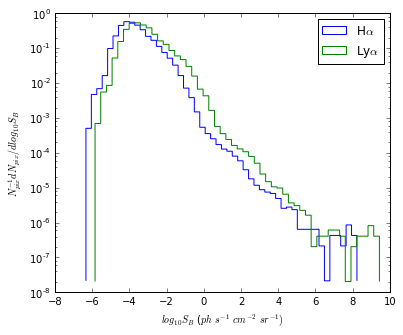

In [3]:
fig = plt.subplots(1,1,figsize=[6,5])
plt.hist(halpha_25mpc.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'H$\alpha$')
plt.hist(lyalpha_25mpc.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'Ly$\alpha$')
#plt.hist(data_27.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 27')
#plt.hist(data_28.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 28')
plt.ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
plt.xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
plt.legend()

#plt.savefig('LyalphaHalphaSBcomparison.png')

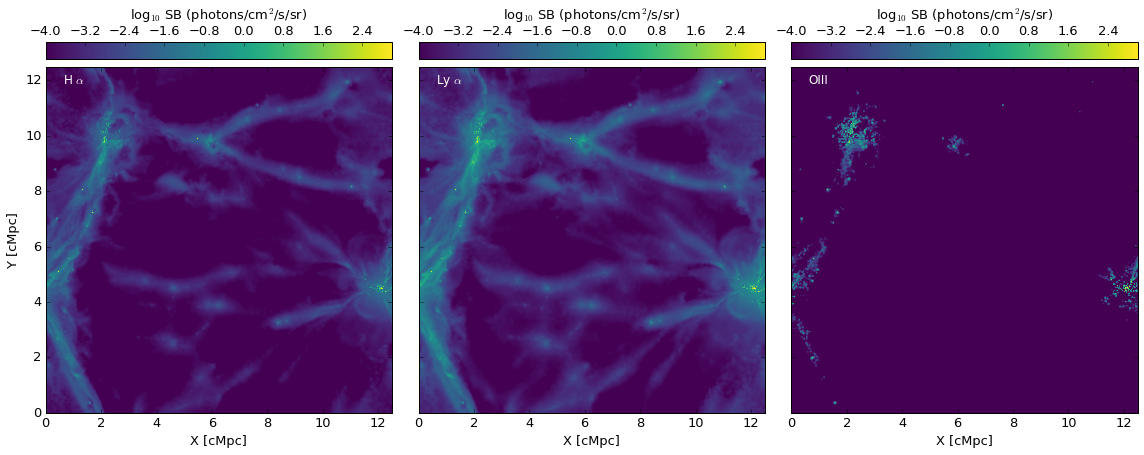

In [15]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=3
xystarts = [0,0]
xyextent = [25.,25.]
pltimg(halpha_25mpc,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc,ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc,ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


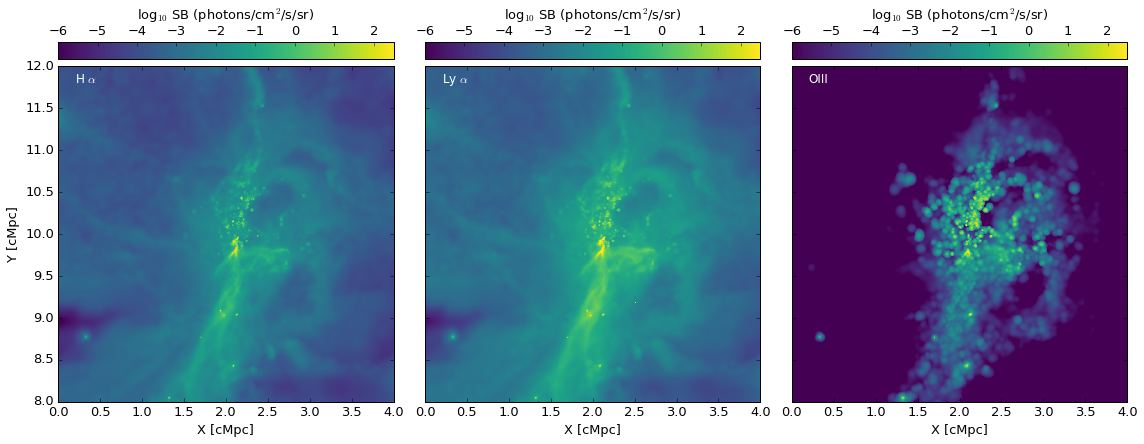

In [18]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=1
Vmin=-6; Vmax=2.5
pixsize = 8000.; boxsize = 25.
xystarts = [0,8]; xyextent = [4,4]

pltimg(datahalpha[0:4./boxsize*pixsize,8./boxsize*pixsize:12./boxsize*pixsize],\
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha[0:4./boxsize*pixsize,8./boxsize*pixsize:12./boxsize*pixsize],\
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(dataoiii[0:4./boxsize*pixsize,8./boxsize*pixsize:12./boxsize*pixsize],\
       ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,16))

Vmin=-4; Vmax=3

colmap='viridis'

pltimg(datahalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax1,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax2,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(dataoiii[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax3,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)

pltimg(10**(datalyalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.]-datahalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.]),\
       ax4,[0,8],[4,4],label=None,colmap = 'plasma',colorbar=True,labelaxes=True,clabel=r'Ly$\alpha$/H$\alpha$')
plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax4.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)


ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

plt.savefig('EAGLE_LyalphaHalphaOIII.png')